In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('/content/winequality-red.csv') #read the dataset

In [ ]:
#explore the dataset
df.head()

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,7.574747,0.560657,0.218081,2.463636,0.100768,15.979798,56.606061,0.996762,3.333737,0.709293,9.790909,5.242424
std,1.070032,0.165261,0.179203,1.367644,0.069247,10.625326,37.494168,0.001103,0.162710,0.304652,0.685132,0.656069
min,4.600000,0.220000,0.000000,1.200000,0.045000,3.000000,10.000000,0.993200,2.930000,0.390000,9.000000,4.000000
25%,7.000000,0.430000,0.065000,1.800000,0.074000,9.000000,25.500000,0.996200,3.240000,0.550000,9.400000,5.000000
50%,7.600000,0.580000,0.200000,2.000000,0.082000,14.000000,46.000000,0.996800,3.340000,0.590000,9.500000,5.000000
75%,8.100000,0.665000,0.305000,2.400000,0.097500,19.500000,82.500000,0.997450,3.415000,0.760000,10.100000,6.000000
max,11.200000,1.130000,0.700000,10.700000,0.464000,52.000000,148.000000,0.999300,3.900000,1.980000,13.100000,7.000000


In [ ]:
df.std()

fixed_acidity            1.070032
volatile acidity         0.165261
citric acid              0.179203
residual sugar           1.367644
chlorides                0.069247
free_sulfur_dioxide     10.625326
total sulfur dioxide    37.494168
density                  0.001103
pH                       0.162710
sulphates                0.304652
alcohol                  0.685132
quality                  0.656069
dtype: float64

In [ ]:
df.value_counts()

fixed_acidity  volatile acidity  citric acid  residual sugar  chlorides  free_sulfur_dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
8.6            0.490             0.28         1.90            0.110      20                   136                   0.9972   2.93  1.95       9.9      6          2
7.7            0.490             0.26         1.90            0.062      9                    31                    0.9966   3.39  0.64       9.6      5          2
7.2            0.725             0.05         4.65            0.086      4                    11                    0.9962   3.41  0.39       10.9     5          2
7.9            0.430             0.21         1.60            0.106      10                   37                    0.9966   3.17  0.91       9.5      5          2
7.3            0.450             0.36         5.90            0.074      12                   87                    0.9978   3.33  0.83       10.5     5          2
                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         99 non-null     float64
 1   volatile acidity      99 non-null     float64
 2   citric acid           99 non-null     float64
 3   residual sugar        99 non-null     float64
 4   chlorides             99 non-null     float64
 5   free_sulfur_dioxide   99 non-null     int64  
 6   total sulfur dioxide  99 non-null     int64  
 7   density               99 non-null     float64
 8   pH                    99 non-null     float64
 9   sulphates             99 non-null     float64
 10  alcohol               99 non-null     float64
 11  quality               99 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 9.4 KB


In [ ]:
df.dropna()

,fixed_acidity,volatile acidity,citric acid,residual sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
94,5.0,1.020,0.04,1.4,0.045,41,85,0.9938,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.3,0.058,17,106,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8,23,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3,22,0.9963,3.25,0.63,9.2,5


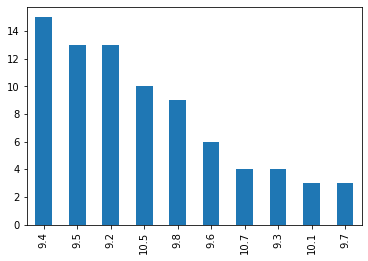

In [ ]:
df["alcohol"].value_counts().head(10).plot(kind="bar")

In [ ]:
#to print the shape
df.shape

(99, 12)

In [ ]:
df.isnull().any()

fixed_acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free_sulfur_dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

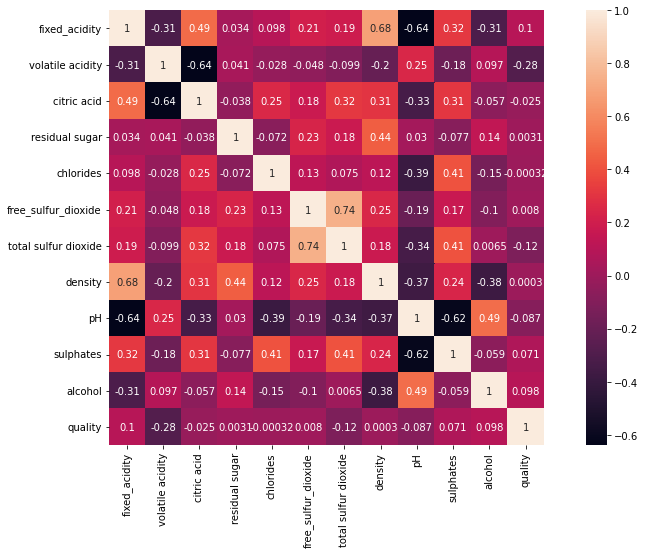

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,square=True,annot=True,cbar=True)

In [ ]:
#to print the name of columns
df.columns

Index(['fixed_acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free_sulfur_dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#to define independent and dependent variable
x=df.drop(['alcohol'],axis=1)
y=df['alcohol']

In [ ]:
#to check whether x is a dataframe or not as it is independent variable
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#to check whether y is a series or not as it is dependent variable
print(type(y))

<class 'pandas.core.series.Series'>
